In [1]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
from gluoncv.data.transforms.pose import detector_to_simple_pose, heatmap_to_coord

In [21]:
detector = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)
pose_net = model_zoo.get_model('simple_pose_resnet18_v1b', pretrained=True)

In [3]:
# Note that we can reset the classes of the detector to only include
# human, so that the NMS process is faster.

detector.reset_class(["person"], reuse_weights=['person'])

In [4]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/pose/soccer.png?raw=true',
                          path='soccer.png')
x, img = data.transforms.presets.ssd.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

class_IDs, scores, bounding_boxs = detector(x)

1562KB [00:00, 3494.01KB/s]                          

Shape of pre-processed image: (1, 3, 512, 605)


In [5]:
pose_input, upscale_bbox = detector_to_simple_pose(img, class_IDs, scores, bounding_boxs)

In [6]:
predicted_heatmap = pose_net(pose_input)
pred_coords, confidence = heatmap_to_coord(predicted_heatmap, upscale_bbox)

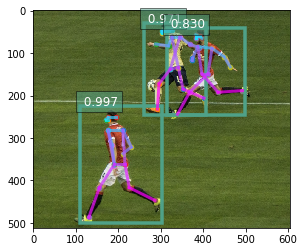

In [7]:
ax = utils.viz.plot_keypoints(img, pred_coords, confidence,
                              class_IDs, bounding_boxs, scores,
                              box_thresh=0.5, keypoint_thresh=0.2)
plt.show()

In [9]:
x, img = data.transforms.presets.ssd.load_test('RicardoPose.jpeg', short=512)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 683, 512)


In [10]:
class_IDs, scores, bounding_boxs = detector(x)

In [11]:
pose_input, upscale_bbox = detector_to_simple_pose(img, class_IDs, scores, bounding_boxs)

In [12]:
predicted_heatmap = pose_net(pose_input)
pred_coords, confidence = heatmap_to_coord(predicted_heatmap, upscale_bbox)

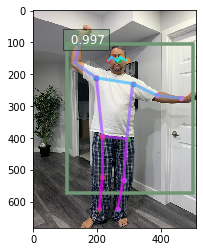

In [13]:
ax = utils.viz.plot_keypoints(img, pred_coords, confidence,
                              class_IDs, bounding_boxs, scores,
                              box_thresh=0.5, keypoint_thresh=0.2)
plt.show()

In [17]:
bounding_boxs


[[[105.410934 105.550446 502.78412  573.2445  ]
  [158.15457  202.63547  379.82816  704.9822  ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1.      ]
  [ -1.        -1.        -1.        -1

In [55]:
x, img = data.transforms.presets.ssd.load_test('WithLeo.jpeg', short=512)
print('Shape of pre-processed image:', x.shape)
class_IDs, scores, bounding_boxs = detector(x)
pose_input, upscale_bbox = detector_to_simple_pose(img, class_IDs, scores, bounding_boxs)
predicted_heatmap = pose_net(pose_input)
pred_coords, confidence = heatmap_to_coord(predicted_heatmap, upscale_bbox)

Shape of pre-processed image: (1, 3, 910, 512)


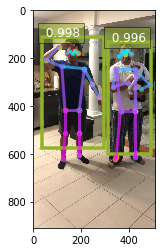

In [56]:
ax = utils.viz.plot_keypoints(img, pred_coords, confidence,
                              class_IDs, bounding_boxs, scores,
                              box_thresh=0.5, keypoint_thresh=0.2)
plt.show()

In [57]:
pred_coords


[[[166.43013  180.02197 ]
  [173.13747  170.98087 ]
  [153.0154   170.98087 ]
  [186.55217  180.02197 ]
  [139.60072  180.02197 ]
  [213.38155  243.30981 ]
  [119.47865  234.26868 ]
  [246.91832  306.5976  ]
  [ 52.405136 207.14532 ]
  [273.74774  360.84424 ]
  [106.06395  152.89865 ]
  [193.2595   415.09094 ]
  [132.89336  415.09094 ]
  [193.2595   514.5432  ]
  [132.89336  514.5432  ]
  [193.2595   604.95435 ]
  [126.18599  623.0366  ]]

 [[383.83038  182.35211 ]
  [392.98535  163.99106 ]
  [374.6754   173.1716  ]
  [411.2953   182.35211 ]
  [360.94293  191.53262 ]
  [425.02777  246.61575 ]
  [347.2105   246.61575 ]
  [489.11255  310.87943 ]
  [333.47803  320.05997 ]
  [452.49268  329.24045 ]
  [397.5628   301.69894 ]
  [425.02777  421.04575 ]
  [365.52045  421.04575 ]
  [425.02777  613.8367  ]
  [347.2105   613.8367  ]
  [429.60522  595.4757  ]
  [342.633    623.0172  ]]]
<NDArray 2x17x2 @cpu(0)>

In [38]:
x, img = data.transforms.presets.ssd.load_test('MeAndLeo.jpeg', short=512)
print('Shape of pre-processed image:', x.shape)
class_IDs, scores, bounding_boxs = detector(x)
pose_input, upscale_bbox = detector_to_simple_pose(img, class_IDs, scores, bounding_boxs)
predicted_heatmap = pose_net(pose_input)
pred_coords, confidence = heatmap_to_coord(predicted_heatmap, upscale_bbox)

Shape of pre-processed image: (1, 3, 683, 512)


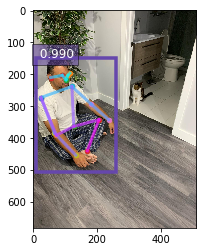

In [39]:
ax = utils.viz.plot_keypoints(img, pred_coords, confidence,
                              class_IDs, bounding_boxs, scores,
                              box_thresh=0.5, keypoint_thresh=0.2)
plt.show()

In [54]:
pred_coords


[[[166.43013  180.02197 ]
  [173.13747  170.98087 ]
  [153.0154   170.98087 ]
  [186.55217  180.02197 ]
  [139.60072  180.02197 ]
  [213.38155  243.30981 ]
  [119.47865  234.26868 ]
  [246.91832  306.5976  ]
  [ 52.405136 207.14532 ]
  [273.74774  360.84424 ]
  [106.06395  152.89865 ]
  [193.2595   415.09094 ]
  [132.89336  415.09094 ]
  [193.2595   514.5432  ]
  [132.89336  514.5432  ]
  [193.2595   604.95435 ]
  [126.18599  623.0366  ]]

 [[383.83038  182.35211 ]
  [392.98535  163.99106 ]
  [374.6754   173.1716  ]
  [411.2953   182.35211 ]
  [360.94293  191.53262 ]
  [425.02777  246.61575 ]
  [347.2105   246.61575 ]
  [489.11255  310.87943 ]
  [333.47803  320.05997 ]
  [452.49268  329.24045 ]
  [397.5628   301.69894 ]
  [425.02777  421.04575 ]
  [365.52045  421.04575 ]
  [425.02777  613.8367  ]
  [347.2105   613.8367  ]
  [429.60522  595.4757  ]
  [342.633    623.0172  ]]]
<NDArray 2x17x2 @cpu(0)>

In [31]:
class_IDs


[[[ 0.]
  [61.]
  [71.]
  [15.]
  [60.]
  [39.]
  [16.]
  [16.]
  [58.]
  [59.]
  [71.]
  [79.]
  [15.]
  [71.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]]]
<NDArray 1x100x1 @cpu(0)>

In [32]:
scores


[[[ 0.9897634 ]
  [ 0.77111334]
  [ 0.52052766]
  [ 0.4703177 ]
  [ 0.19747794]
  [ 0.06376337]
  [ 0.05646287]
  [ 0.05010609]
  [ 0.04605519]
  [ 0.0454374 ]
  [ 0.04062699]
  [ 0.02829163]
  [ 0.02358006]
  [ 0.01146786]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1. 

In [58]:
x, img = data.transforms.presets.ssd.load_test('JustLeo.jpeg', short=512)
print('Shape of pre-processed image:', x.shape)
class_IDs, scores, bounding_boxs = detector(x)

Shape of pre-processed image: (1, 3, 683, 512)


In [59]:
scores


[[[ 0.864195  ]
  [ 0.21444078]
  [ 0.07493798]
  [ 0.04316791]
  [ 0.0271905 ]
  [ 0.02471812]
  [ 0.01625268]
  [ 0.01404926]
  [ 0.01154597]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1. 

In [60]:
class_IDs


[[[15.]
  [62.]
  [62.]
  [56.]
  [63.]
  [73.]
  [57.]
  [59.]
  [28.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]]]
<NDArray 1x100x1 @cpu(0)>